In [ ]:
#final succeed

In [ ]:
# from xml to yolov5

In [1]:
import xml.etree.ElementTree as ET
import os
import math

def convert_robndbox_to_yolo(cx, cy, w, h, angle, img_width, img_height):
    # Convert angle from radians to normalized angle
    angle_rad = angle % (2 * math.pi)
    angle_norm = angle_rad / (2 * math.pi)

    # Adjust angle to rotate the box correctly
    if angle_rad > math.pi / 2 and angle_rad <= 3 * math.pi / 2:
        # Angle is between 90 to 270 degrees, w is the vertical side (height) of the bounding box
        w, h = w, h  # Swap since w should be width (horizontal side) after rotation
    else:
        w, h = h, w
        

    # Calculate rotated bounding box
    bbox_width = w * abs(math.cos(angle_rad)) + h * abs(math.sin(angle_rad))
    bbox_height = w * abs(math.sin(angle_rad)) + h * abs(math.cos(angle_rad))

    # Calculate normalized coordinates
    x_center_norm = cx / img_width
    y_center_norm = cy / img_height
    w_norm = bbox_width / img_width
    h_norm = bbox_height / img_height

    # return (x_center_norm, y_center_norm, w_norm, h_norm, angle_norm)
    return (x_center_norm, y_center_norm, w_norm, h_norm)


# Rest of the code remains unchanged...

def convert_xml_to_yolo(xml_folder, txt_folder, img_width, img_height):
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(xml_folder, xml_file)
            tree = ET.parse(xml_path)
            root = tree.getroot()
            txt_file_name = xml_file.replace('.xml', '.txt')
            txt_path = os.path.join(txt_folder, txt_file_name)
            with open(txt_path, 'w') as txt_file:
                for obj in root.findall('object'):
                    robndbox = obj.find('robndbox')
                    cx = float(robndbox.find('cx').text)
                    cy = float(robndbox.find('cy').text)
                    w = float(robndbox.find('w').text)
                    h = float(robndbox.find('h').text)
                    angle = float(robndbox.find('angle').text)

                    # Convert robndbox to YOLO format and write to txt
                    yolo_bbox = convert_robndbox_to_yolo(cx, cy, w, h, angle, img_width, img_height)
                    txt_file.write(f"0 {yolo_bbox[0]} {yolo_bbox[1]} {yolo_bbox[2]} {yolo_bbox[3]}\n")

# Set paths and image dimensions
xml_folder = 'E:\individualdata\BaiduNetdiskDownload\RSDD-SAR\RSDD-SAR\Annotations'  # Replace with XML folder path
txt_folder = 'E:\individualdata\BaiduNetdiskDownload\RSDD-SAR\RSDD-SAR\images-annotations\Annotation'  # Replace with desired TXT folder path

img_width, img_height = 512, 512  # Replace with the actual dimensions of your images

# Convert XML files to YOLO format TXT files
convert_xml_to_yolo(xml_folder, txt_folder, img_width, img_height)

print("Conversion completed.")


Conversion completed.


In [ ]:
#from xml to yolov5-obb

In [16]:
import os
import xml.etree.ElementTree as ET
import math

def calculate_rotated_bbox(cx, cy, w, h, angle, img_width, img_height):
    # Normalise the angle to between 0 and 2π
    angle_rad = angle % (2 * math.pi)
    
    # Judging and adjusting w and h
    if angle_rad > math.pi / 2 and angle_rad <= 3 * math.pi / 2:
        w, h = w, h  # Remain constant because the width is the length of the horizontal edge
    else :
        w, h = h, w
        

    # Calculate the coordinates of the four corner points
    dx = w / 2
    dy = h / 2
    corners = [(-dx, -dy), (dx, -dy), (dx, dy), (-dx, dy)]
    
    # Rotate these corner points
    rotated_corners = []
    for corner in corners:
        x, y = corner
        x_rot = math.cos(angle_rad) * x - math.sin(angle_rad) * y + cx
        y_rot = math.sin(angle_rad) * x + math.cos(angle_rad) * y + cy
        rotated_corners.append((x_rot, y_rot))
    
    return [coord for point in rotated_corners for coord in point]

def convert_xml_to_yolo_obb(xml_folder, txt_folder):
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            tree = ET.parse(os.path.join(xml_folder, xml_file))
            root = tree.getroot()
            img_width = int(root.find('size/width').text)
            img_height = int(root.find('size/height').text)
            txt_file_path = os.path.join(txt_folder, xml_file.replace('.xml', '.txt'))

            # Open TXT file ready to write data for multiple objects
            with open(txt_file_path, 'w') as f:
                for obj in root.iter('object'):
                    obj_type = obj.find('type').text
                    if obj_type == 'robndbox':
                        robndbox = obj.find('robndbox')
                        cx = float(robndbox.find('cx').text)
                        cy = float(robndbox.find('cy').text)
                        w = float(robndbox.find('w').text)
                        h = float(robndbox.find('h').text)
                        angle = float(robndbox.find('angle').text)
                        name = obj.find('name').text

                        # Calculate the coordinates of the rotated bounding box
                        rotated_bbox = calculate_rotated_bbox(cx, cy, w, h, angle, img_width, img_height)

                        # Write the coordinates and name of the rotating bounding box of the current object.
                        line = ' '.join(map(str, rotated_bbox)) + f' {name} 0\n'
                        f.write(line)

            print(f"Converted {xml_file} to YOLOv5-OBB format.")

# Set paths
xml_folder = 'E:\individualdata\BaiduNetdiskDownload\RSDD-SAR\RSDD-SAR\data\Annotations'
txt_folder = 'E:\individualdata\BaiduNetdiskDownload\RSDD-SAR\RSDD-SAR\data-yolo-obb\Annotation-obb'

# Ensure the output directory exists
os.makedirs(txt_folder, exist_ok=True)

# Convert XML files to YOLOv5-OBB format TXT files
convert_xml_to_yolo_obb(xml_folder, txt_folder)

print("Conversion to YOLOv5-OBB format completed.")


Converted 0_0_5.xml to YOLOv5-OBB format.
Converted 0_11_44.xml to YOLOv5-OBB format.
Converted 0_11_45.xml to YOLOv5-OBB format.
Converted 0_12_45.xml to YOLOv5-OBB format.
Converted 0_14_44.xml to YOLOv5-OBB format.
Converted 0_16_29.xml to YOLOv5-OBB format.
Converted 0_16_37.xml to YOLOv5-OBB format.
Converted 0_16_54.xml to YOLOv5-OBB format.
Converted 0_17_27.xml to YOLOv5-OBB format.
Converted 0_17_28.xml to YOLOv5-OBB format.
Converted 0_17_29.xml to YOLOv5-OBB format.
Converted 0_17_37.xml to YOLOv5-OBB format.
Converted 0_18_35.xml to YOLOv5-OBB format.
Converted 0_18_48.xml to YOLOv5-OBB format.
Converted 0_18_54.xml to YOLOv5-OBB format.
Converted 0_19_29.xml to YOLOv5-OBB format.
Converted 0_19_46.xml to YOLOv5-OBB format.
Converted 0_20_44.xml to YOLOv5-OBB format.
Converted 0_20_49.xml to YOLOv5-OBB format.
Converted 0_21_30.xml to YOLOv5-OBB format.
Converted 0_21_48.xml to YOLOv5-OBB format.
Converted 0_22_32.xml to YOLOv5-OBB format.
Converted 0_22_52.xml to YOLOv5-OB

In [ ]:
#from xml to yolov8-obb

In [6]:
import os
import xml.etree.ElementTree as ET
import math

def calculate_rotated_bbox(cx, cy, w, h, angle):
    # Normalise the angle to between 0 and 2π
    angle_rad = angle % (2 * math.pi)
    
    # Judging and adjusting w and h
    if angle_rad > math.pi / 2 and angle_rad <= 3 * math.pi / 2:
        w, h = w, h  # Remain constant because the width is the length of the horizontal edge
    else:
        w, h = h, w  
    
    # Calculate the coordinates of the four corner points
    dx = w / 2
    dy = h / 2
    corners = [(-dx, -dy), (dx, -dy), (dx, dy), (-dx, dy)]
    
    # Rotate these corner points
    rotated_corners = []
    for corner in corners:
        x, y = corner
        x_rot = math.cos(angle_rad) * x - math.sin(angle_rad) * y + cx
        y_rot = math.sin(angle_rad) * x + math.cos(angle_rad) * y + cy
        rotated_corners.append((x_rot, y_rot))
    
    return rotated_corners

def convert_xml_to_yolo_obb(xml_folder, txt_folder, img_width, img_height):
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            tree = ET.parse(os.path.join(xml_folder, xml_file))
            root = tree.getroot()

            txt_file_path = os.path.join(txt_folder, xml_file.replace('.xml', '.txt'))
            with open(txt_file_path, 'w') as f:
                for obj in root.iter('object'):
                    obj_type = obj.find('type').text
                    if obj_type == 'robndbox':
                        robndbox = obj.find('robndbox')
                        cx = float(robndbox.find('cx').text)
                        cy = float(robndbox.find('cy').text)
                        w = float(robndbox.find('w').text)
                        h = float(robndbox.find('h').text)
                        angle = float(robndbox.find('angle').text)

                        # Calculate the coordinates of the rotated bounding box
                        corners = calculate_rotated_bbox(cx, cy, w, h, angle)

                        # Normalise and flatten the coordinates
                        normalized_flattened_corners = [coord / img_width if i % 2 == 0 else coord / img_height 
                                                        for i, coord in enumerate(sum(corners, ()))]

                        # Write the coordinates of the rotating bounding box
                        f.write('0 ' + ' '.join(map(str, normalized_flattened_corners)) + '\n')

            print(f"Converted {xml_file} to YOLOv8-OBB format.")

# Set paths
xml_folder = '  '
txt_folder = '  '

# Ensure the output directory exists
os.makedirs(txt_folder, exist_ok=True)

# Image dimensions (need to be set according to your specific dataset)
img_width, img_height = 512, 512

# Convert XML files to YOLOv8-OBB format TXT files
convert_xml_to_yolo_obb(xml_folder, txt_folder, img_width, img_height)

print("Conversion to YOLOv8-OBB format completed.")


In [2]:
#check annotation

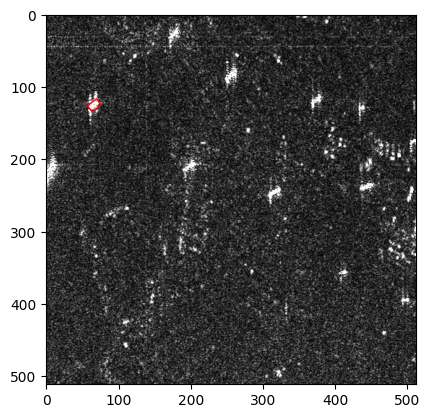

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_rotated_bbox(image_path, rotated_bbox):
    """
    Visualizes a rotated bounding box on an image.

    Parameters:
    - image_path: The path to the image file.
    - rotated_bbox: A list of 8 coordinates representing the four corners of the rotated bounding box, in the format [x1, y1, x2, y2, x3, y3, x4, y4].
    """
    # Load the image
    img = Image.open(image_path)
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(img)
    
    # Extract the coordinates
    x1, y1, x2, y2, x3, y3, x4, y4 = rotated_bbox
    
    # Create a polygon patch representing the rotated bounding box
    polygon = patches.Polygon([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], closed=True, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(polygon)
    
    plt.show()

# Example usage
image_path = r'..\JPEGImages\12_2_25.jpg'
rotated_bbox = [56.812960910374166 ,125.46605058133215 ,69.34355352562338 ,116.10188499005712, 75.97263908962582, 124.97254941866785, 63.44204647437661, 134.3367150099429]  # Example coordinates
visualize_rotated_bbox(image_path, rotated_bbox)


In [ ]:
#Filter out boats based on pixel size

In [ ]:
#Filtering test set images from the total data set
import os
import shutil

index_file_path = r'..\RSDD-SAR\RSDD-SAR\ImageSets\test.txt'  # Index File Path
all_xml_folder_path = r'..\RSDD-SAR\RSDD-SAR\data\Annotations'  # Directory containing all XML files
test_xml_folder_path = r'..\dataset\small-test\small-xml'  # Destination directory for test set XML files

# Ensure that the target directory exists
os.makedirs(test_xml_folder_path, exist_ok=True)

# Read the index file to get the filename of the test set
with open(index_file_path, 'r') as file:
    test_file_names = set(line.strip() for line in file)

# Iterate over all XML files
for xml_file in os.listdir(all_xml_folder_path):
    base_name = os.path.splitext(xml_file)[0]  # Get filename without extension
    if base_name in test_file_names:
        # If the file name is in the test set, copy the file
        source_path = os.path.join(all_xml_folder_path, xml_file)
        destination_path = os.path.join(test_xml_folder_path, xml_file)
        shutil.copy(source_path, destination_path)

print("Test XML files have been successfully separated.")


In [ ]:
#Filter datasets smaller than 32*32 pixels for test set
import os
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


images_folder_path = r'..\datasets\images\test'  # image path
annotations_folder_path = r'..\dataset\small-test\small-xml'  # annotation path

# Output directory for small ships
output_images_folder_path = r'..\dataset\small-test\images'
output_annotations_folder_path = r'..\dataset\small-test\labels'

# Make sure the output directory exists
os.makedirs(output_images_folder_path, exist_ok=True)
os.makedirs(output_annotations_folder_path, exist_ok=True)

def check_for_small_ships(xml_file_path):
    
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    small_ship_area_threshold = 32**2
    small_ship_areas = []  # Area for storing small ships
    contains_small_ship = False
    for obj in root.iter('object'):
        obj_type = obj.find('type').text
        if obj_type == 'robndbox':
            robndbox = obj.find('robndbox')
            w = float(robndbox.find('w').text)
            
            h = float(robndbox.find('h').text)
            area = w * h  # calculate area
            if area < small_ship_area_threshold:
                contains_small_ship = True
                small_ship_areas.append(area)
    return contains_small_ship, small_ship_areas

small_ship_areas_all = []  # Area of all small ships used for distribution maps
small_ship_files = []  # Storing image filenames containing small ships


for xml_file in os.listdir(annotations_folder_path):
    if xml_file.endswith('.xml'):
        xml_file_path = os.path.join(annotations_folder_path, xml_file)
        contains_small_ship, small_ship_areas = check_for_small_ships(xml_file_path)
        if contains_small_ship:
            base_name = xml_file[:-4]
            small_ship_files.append(base_name)
            small_ship_areas_all.extend(small_ship_areas)
            
            shutil.copy(os.path.join(images_folder_path, base_name + '.jpg'), output_images_folder_path)
            shutil.copy(xml_file_path, output_annotations_folder_path)

# Distribution map showing area of small ship
plt.hist(small_ship_areas_all, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Small Ship Areas')
plt.xlabel('Area (pixels^2)')
plt.ylabel('Count')
plt.show()

# Percentage of total images printed that contain small ships
print(f"Total images: {len(os.listdir(annotations_folder_path))}")
print(f"Images with small ships: {len(small_ship_files)}")
print(f"Proportion of images with small ships: {len(small_ship_files) / len(os.listdir(annotations_folder_path)):.2f}")


In [ ]:
#Filtering the train set for small targets and storing targets of other sizes
import os
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Image File Path
images_folder_path =r'D:\yolov8test\dataset\images\train'
# Annotation file path (XML)
annotations_folder_path = r'E:\individualdata\BaiduNetdiskDownload\RSDD-SAR\RSDD-SAR\data\Annotations'
# TXT markup file path
annotations_txt_folder_path = r'D:\yolov8test\dataset\labels\train'
# The output directory is used to store images
output_images_folder_path = r'D:\yolov8test\dataset\images\small-tarin'
# The output directory is used to store TXT annotations
output_annotations_folder_path = r'D:\yolov8test\dataset\labels\small-tarin'


# output_images_folder_path_others = r'D:\yolov8-obb\dataset\large-test\images'
# # The output directory is used to store TXT annotations that do not contain small ships
# output_annotations_folder_path_others = r'D:\yolov8-obb\dataset\large-test\labels'

# Make sure these output directories exist
# os.makedirs(output_images_folder_path_others, exist_ok=True)
# os.makedirs(output_annotations_folder_path_others, exist_ok=True)

# Make sure the output directory exists
os.makedirs(output_images_folder_path, exist_ok=True)
os.makedirs(output_annotations_folder_path, exist_ok=True)

def check_for_small_ships(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    small_ship_area_threshold = 32**2
    small_ship_areas = []  
    contains_small_ship = False
    for obj in root.iter('object'):
        obj_type = obj.find('type').text
        if obj_type == 'robndbox':
            robndbox = obj.find('robndbox')
            w = float(robndbox.find('w').text)
            h = float(robndbox.find('h').text)
            area = w * h
            if area < small_ship_area_threshold:
                contains_small_ship = True
                small_ship_areas.append(area)
    return contains_small_ship, small_ship_areas

small_ship_areas_all = []
small_ship_files = []

for xml_file in os.listdir(annotations_folder_path):
    if xml_file.endswith('.xml'):
        xml_file_path = os.path.join(annotations_folder_path, xml_file)
        contains_small_ship, small_ship_areas = check_for_small_ships(xml_file_path)
        if contains_small_ship:
            base_name = xml_file[:-4]
            small_ship_files.append(base_name)
            small_ship_areas_all.extend(small_ship_areas)
            
            shutil.copy(os.path.join(images_folder_path, base_name + '.jpg'), output_images_folder_path)
            # Find and copy the corresponding TXT file according to the XML file
            txt_file_path = os.path.join(annotations_txt_folder_path, base_name + '.txt')
            if os.path.exists(txt_file_path):
                shutil.copy(txt_file_path, output_annotations_folder_path)


plt.hist(small_ship_areas_all, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Small Ship Areas')
plt.xlabel('Area (pixels^2)')
plt.ylabel('Count')
plt.show()


print(f"Total images: {len(os.listdir(annotations_folder_path))}")
print(f"Images with small ships: {len(small_ship_files)}")
print(f"Proportion of images with small ships: {len(small_ship_files) / len(os.listdir(annotations_folder_path)):.2f}")


# # Iterate through all image files, copying unchecked files
# for image_file in os.listdir(images_folder_path):
#     base_name = os.path.splitext(image_file)[0]
#     if base_name not in small_ship_files:
#         # Image not selected to contain small ships, copy to another directory
#         shutil.copy(os.path.join(images_folder_path, image_file), output_images_folder_path_others)

# # Iterate through all TXT annotated files, copying unchecked files
# for txt_file in os.listdir(annotations_txt_folder_path):
#     base_name = os.path.splitext(txt_file)[0]
#     if base_name not in small_ship_files:
#         # TXT markup not selected to contain small ships, copied to another directory
#         shutil.copy(os.path.join(annotations_txt_folder_path, txt_file), output_annotations_folder_path_others)

print("Finished processing. Images and labels not containing small ships have been moved to separate folders.")



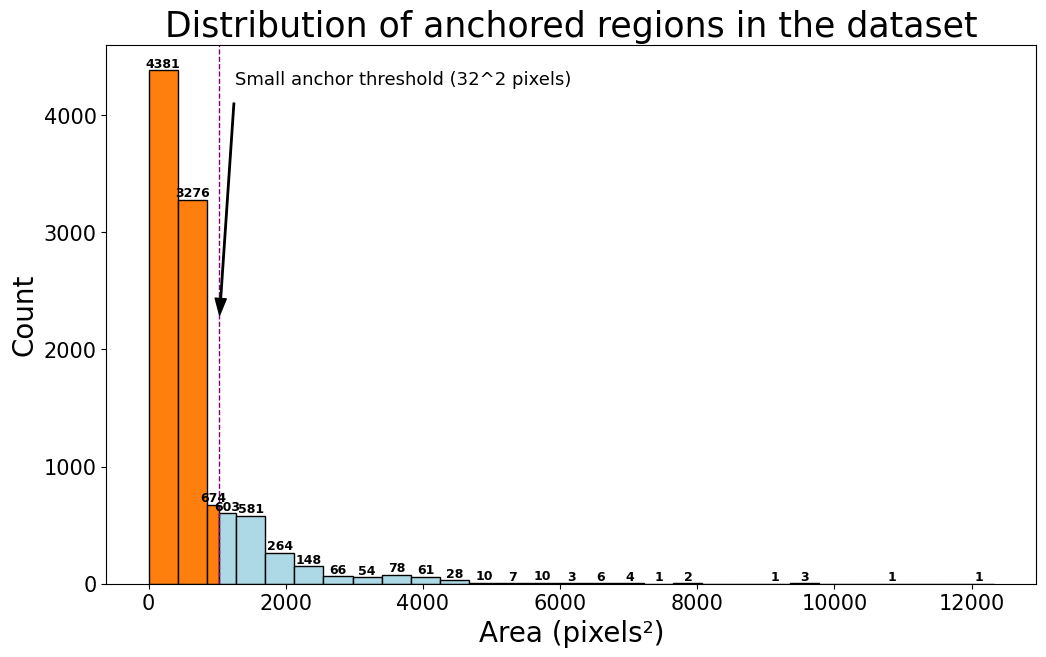

Total anchors: 10263
Small anchors (area < 1024pixels): 8331.0
Proportion of small anchors: 81.18%


In [15]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

# Path for the dataset annotations (xml)
annotations_folder_path = r'..\RSDD-SAR\RSDD-SAR\data\Annotations'

def collect_anchor_areas(folder_path):
    anchor_areas = []
    for xml_file in os.listdir(folder_path):
        if xml_file.endswith('.xml'):
            xml_file_path = os.path.join(folder_path, xml_file)
            tree = ET.parse(xml_file_path)
            root = tree.getroot()
            for obj in root.iter('object'):
                if obj.find('type').text == 'robndbox':
                    robndbox = obj.find('robndbox')
                    w = float(robndbox.find('w').text)
                    h = float(robndbox.find('h').text)
                    area = w * h
                    anchor_areas.append(area)
    return anchor_areas

# Collect areas from the dataset
dataset_anchor_areas = collect_anchor_areas(annotations_folder_path)

# Create bins for histogram
max_area = max(dataset_anchor_areas)
bins = np.linspace(0, max_area, 30)
small_index = np.searchsorted(bins, 1024)  # Find index to insert 1024 for exact match
bins = np.insert(bins, small_index, 1024)  # Insert 1024 into bins

# Plotting histogram
plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(dataset_anchor_areas, bins=bins, color='lightblue', edgecolor='black', rwidth=1)

plt.title('Distribution of anchored regions in the dataset',fontsize=25)
plt.xlabel('Area (pixels²)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Highlight small anchors and annotate
for patch, leftside, value in zip(patches, bins[:-1], n):
    if leftside < 1024:
        patch.set_facecolor('#ff7f0e')
    if value > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), f'{int(value)}',
                 ha='center', va='bottom', fontsize=9, fontweight='bold')  # 调整fontsize和fontweight

# Adding a dashed line and annotation for the threshold
plt.axvline(x=1024, color='purple', linestyle='dashed', linewidth=1)
plt.annotate('Small anchor threshold (32^2 pixels)', xy=(1024, max(n)/2), xytext=(max_area*0.5, max(n)),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             horizontalalignment='right', verticalalignment='top',fontsize=13)

# plt.savefig(r'C:\Users\ASUS\Desktop\individual project\anchor_area_distribution.png')
plt.show()

# Proportion of small anchors
small_anchors_count = sum(n[:np.searchsorted(bins, 1024)])
print(f"Total anchors: {len(dataset_anchor_areas)}")
print(f"Small anchors (area < 1024pixels): {small_anchors_count}")
print(f"Proportion of small anchors: {small_anchors_count / len(dataset_anchor_areas):.2%}")




In [2]:
#Make inshore test sets. Automatically match corresponding txt files based on filtered images.
import os
import shutil


source_txt_dir = r'D:\yolov8-obb\datasets\labels\train'  # The folder where all the txt files of the label information are located
selected_images_dir = r'D:\yolov8-obb\dataset\images\train-offshore'  # The folder where the filtered images are located
selected_txt_dir = r'E:\yolov8-obb-compare\auginshorerstatasets\labels\train'  # New folder for filtered txt files
# remaining_txt_dir = r'D:\yolov8-obb\dataset\labels\train-offshore'  # A new folder for the labels that are left over after filtering


os.makedirs(selected_txt_dir, exist_ok=True)
# os.makedirs(remaining_txt_dir, exist_ok=True)

# Get the filenames of all selected images
selected_images = {os.path.splitext(file)[0] for file in os.listdir(selected_images_dir) if file.endswith(('.jpg', '.png'))}

# Iterate over all txt files
for file in os.listdir(source_txt_dir):
    if file.endswith('.txt'):
        # Check if the txt file corresponds to the selected image.
        txt_basename = os.path.splitext(file)[0]
        if txt_basename in selected_images:
            # Copy the corresponding txt file to selected_txt_dir
            shutil.copy(os.path.join(source_txt_dir, file), selected_txt_dir)
        else:
            continue
            # Copy unchecked txt files to maintaining_txt_dir
            # shutil.copy(os.path.join(source_txt_dir, file), remaining_txt_dir)

print("complete")


complete


In [1]:
#argumentation rotation

In [22]:
import os
import numpy as np
from PIL import Image

def rotate_image(image, angle):
    return image.rotate(angle, expand=True)

def rotate_point(p, angle, center):
    angle_rad = np.radians(angle)
    x, y = p
    ox, oy = center
    qx = ox + np.cos(angle_rad) * (x - ox) - np.sin(angle_rad) * (y - oy)
    qy = oy + np.sin(angle_rad) * (x - ox) + np.cos(angle_rad) * (y - oy)
    return qx, qy

def rotate_box(coords, angle, center, img_size):
    coords = np.array(coords).reshape(-1, 2) * img_size
    rotated_coords = [rotate_point(p, angle, center) for p in coords]
    # Normalise the coordinates, taking care to treat width and height separately
    rotated_coords = np.array(rotated_coords).flatten()
    rotated_coords[0::2] /= img_size[0]  # Divide the x-coordinate by the width
    rotated_coords[1::2] /= img_size[1]  # Divide the y-coordinate by the height
    return rotated_coords


def process_annotation_line(line, angle, img_size):
    parts = line.strip().split()
    class_label = parts[0]
    coords = list(map(float, parts[1:]))
    cx, cy = img_size[0] / 2, img_size[1] / 2
    rotated_coords = rotate_box(coords, -angle, (cx, cy), img_size)
    return f"{class_label} " + ' '.join(map(str, rotated_coords))

def process_files(img_dir, txt_dir, output_img_dir, output_txt_dir, angle_choice=[90, -90]):
    if not os.path.exists(output_img_dir):
        os.makedirs(output_img_dir)
    if not os.path.exists(output_txt_dir):
        os.makedirs(output_txt_dir)

    for filename in os.listdir(img_dir):
        if filename.endswith(('.jpg', '.png')):
            img_path = os.path.join(img_dir, filename)
            txt_path = os.path.join(txt_dir, filename.rsplit('.', 1)[0] + '.txt')

            if os.path.exists(txt_path):
                with Image.open(img_path) as img:
                    img_size = img.size
                    angle = np.random.choice(angle_choice)  # Randomly choose an angle to rotate

                    with open(txt_path, 'r') as f:
                        lines = f.readlines()

                    new_img = rotate_image(img, angle)
                    new_img_path = os.path.join(output_img_dir, f"{filename.rsplit('.', 1)[0]}_rot{angle}.jpg")
                    new_img.save(new_img_path)

                    new_txt_lines = [process_annotation_line(line, angle, img_size) for line in lines]
                    new_txt_path = os.path.join(output_txt_dir, f"{filename.rsplit('.', 1)[0]}_rot{angle}.txt")
                    with open(new_txt_path, 'w') as f:
                        f.writelines(new_txt_lines)

if __name__ == "__main__":
    img_dir = r'E:\yolov8-obb-compare\datasets\images\train'  # Path to the directory containing images
    txt_dir = r'E:\yolov8-obb-compare\datasets\labels\train'  # Path to the directory containing annotation txt files
    output_img_dir = r'E:\yolov8-obb-compare\augdata\images\train'  # Path to save rotated images
    output_txt_dir = r'E:\yolov8-obb-compare\augdata\labels\train'  # Path to save rotated annotations

    process_files(img_dir, txt_dir, output_img_dir, output_txt_dir)


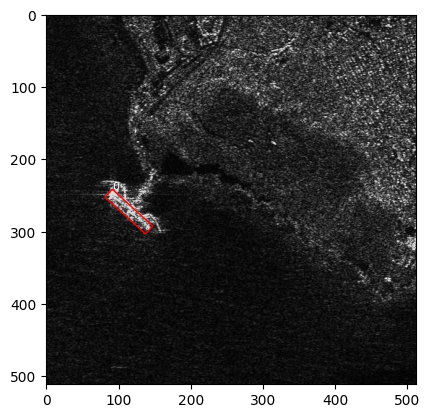

In [21]:
#Drawing to check that the image and the corresponding annotation information is correctly rotated.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def plot_image_and_boxes(img_path, txt_path):
    img = Image.open(img_path)
    width, height = img.size
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    if os.path.exists(txt_path):
        with open(txt_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split(' ')
            label = parts[0]
            coords = list(map(float, parts[1:]))
            # Assume coords are in the format: x1, y1, x2, y2, x3, y3, x4, y4
            poly_coords = np.array(coords).reshape((4, 2)) * [width, height]
            poly = patches.Polygon(poly_coords, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(poly)
            ax.text(poly_coords[0, 0], poly_coords[0, 1], label, color='white', fontsize=8)

    plt.show()

# Example usage:
img_file = r'E:\yolov8-obb-compare\augindata\images\train\0_16_29_rot-90.jpg'  # Replace with your image file path
ann_file = r'E:\yolov8-obb-compare\augindata\labels\train\0_16_29_rot-90.txt'  # Replace with your annotation file path
plot_image_and_boxes(img_file, ann_file)
